https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.surface.html

In [2]:
from netCDF4 import Dataset
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Surface Air Temp

https://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBSearch.pl?Dataset=NCEP+Reanalysis+Daily+Averages&Variable=Air+Temperature&group=0&submit=Search

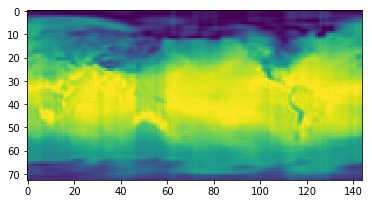

In [3]:
data = Dataset("C:/Users/zdunkerton/Documents/GitHubData/Hurricane/Initial_Data/Temp_surface_4xDaily/air.sig995.2012.nc", "r")
temp = data.variables['air'][10]
temp = scaler.fit_transform(temp)
imgplot = plt.imshow(temp)
plt.show()

In [5]:
data.variables["time"]

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    delta_t: 0000-00-00 06:00:00
    standard_name: time
    axis: T
    units: hours since 1800-01-01 00:00:0.0
    actual_range: [1858344. 1867122.]
unlimited dimensions: time
current shape = (1464,)
filling on, default _FillValue of 9.969209968386869e+36 used

Surface Pressure 

https://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBSearch.pl?Dataset=NCEP+Reanalysis+Daily+Averages&Variable=Pressure&group=0&submit=Search

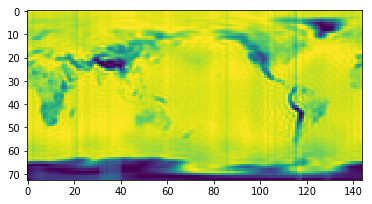

In [9]:
data = Dataset("C:/Users/zdunkerton/Downloads/pres.sfc.2017.nc", "r")
pres = data.variables['pres'][10]
pres = scaler.fit_transform(pres)
imgplot = plt.imshow(pres)
plt.show()

https://www.esrl.noaa.gov/psd/cgi-bin/db_search/DBSearch.pl?Dataset=NCEP+Reanalysis+Daily+Averages&Variable=U-wind&group=0&submit=Search

(73, 144)


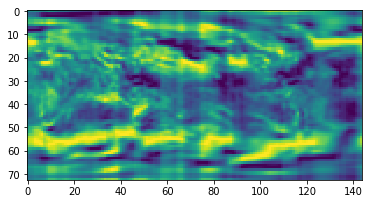

In [10]:
data = Dataset("C:/Users/zdunkerton/Downloads/uwnd.sig995.2017.nc", "r")
uwnd = data.variables['uwnd'][10]
uwnd = scaler.fit_transform(uwnd)
print(uwnd.shape)
imgplot = plt.imshow(uwnd)
plt.show()

In [13]:
a = np.array([temp,pres,uwnd])
a.shape

(3, 73, 144)

In [15]:
uwnd = data.variables['uwnd']

In [16]:
uwnd.shape

(365, 73, 144)

In [58]:
df = pd.read_csv("./atlantic.csv")

In [59]:
df = df.loc[df["Status"]=="HU"]
df.shape

(14537, 22)

In [60]:
df = df.loc[df['Date']>20000000]

In [61]:
df.shape

(1697, 22)

In [92]:
import os

folder = "C:/users/zdunkerton/documents/githubdata/hurricane"
for dir in os.listdir(folder):
    data = []
    for filename in os.listdir(folder+"/"+dir):
        x = Dataset(folder+"/"+dir+"/"+filename,'r').variables[filename.split('.')[0]]
        #x = scaler.fit_transform(x)
        if(x.shape[0]>1460):
            x =x[:1460,:,:]
        data.append(x)
    data = np.array(data)
    name = "./"+dir+".npy"
    np.save(name, data)

In [88]:
data = np.array(data)
data.shape

(64, 1460, 73, 144)

In [89]:
np.save("./data.npy", data)